In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv(r"C:\Users\ayush\OneDrive\Desktop\projects\ds_cricket_proj\Battng info.csv")


In [13]:
df.columns

Index(['Unnamed: 0', 'Batsman', 'Mode of Dismissal', 'Runs Scored',
       'Balls Faced', 'Fours', 'Sixes', 'Strike Rate', 'Innings', 'Location',
       'Date', 'Batting Position', 'Format', 'Year', 'Match', 'Series',
       'Dismissal Type'],
      dtype='object')

In [14]:
#number dismissal types
df["Dismissal Type"].value_counts()

Dismissal Type
caught and bowled    80
bowled               38
other                18
run out               3
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Run Scorers'}, ylabel='Batsman'>

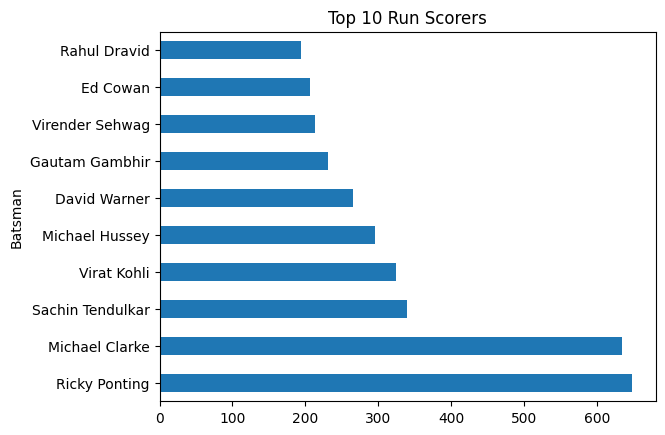

In [20]:
#top run scorer for the team
top_scorers = df.groupby('Batsman')['Runs Scored'].sum().sort_values(ascending=False).head(10)
top_scorers.plot(kind='barh', title='Top 10 Run Scorers')

<Axes: title={'center': 'Dismissal Types'}, ylabel='count'>

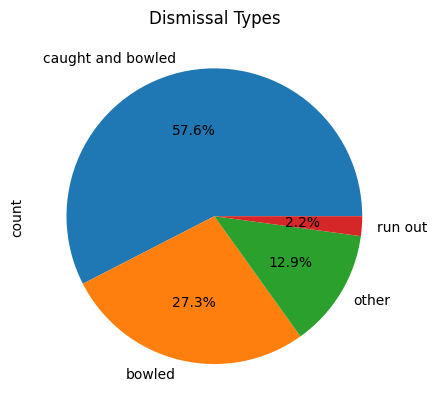

In [22]:
#most dismissal types
df['Dismissal Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Dismissal Types')



In [24]:
#number of 50s and 100s
df['fifty'] = df['Runs Scored'].apply(lambda x: 1 if 50 <= x < 100 else 0)
df['century'] = df['Runs Scored'].apply(lambda x: 1 if x >= 100 else 0)
print("Total 50s:", df['fifty'].sum())
print("Total 100s:", df['century'].sum())


Total 50s: 20
Total 100s: 8


<Axes: xlabel='Runs Scored', ylabel='Strike Rate'>

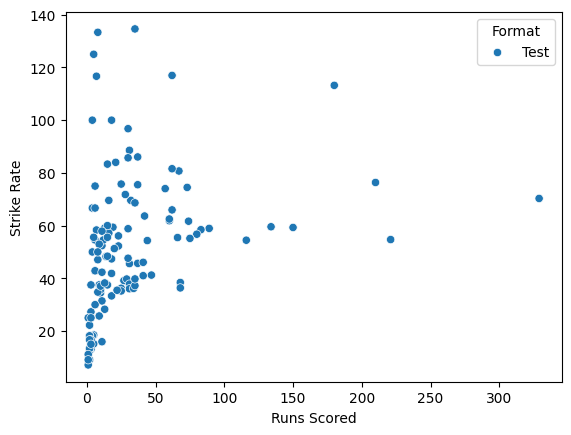

In [25]:
#Relationship between strike rate and runs
sns.scatterplot(data=df, x='Runs Scored', y='Strike Rate', hue='Format')


<Axes: xlabel='Batting Position', ylabel='Runs Scored'>

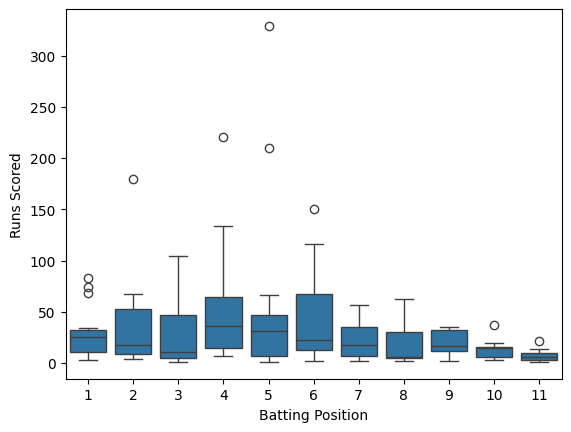

In [26]:
#Performance by batting position
sns.boxplot(data=df, x='Batting Position', y='Runs Scored')

In [27]:
#Best/worst stadiums in terms of runs
df.groupby('Location')['Runs Scored'].mean().sort_values(ascending=False).head(10)


Location
Sydney Cricket Ground, Sydney                54.363636
Adelaide Oval, Adelaide                      34.314286
Narendra Modi Stadium A Ground, Ahmedabad    32.600000
W.A.C.A. Ground, Perth                       25.259259
Melbourne Cricket Ground, Melbourne          24.250000
Name: Runs Scored, dtype: float64

<Axes: xlabel='Year', ylabel='Runs Scored'>

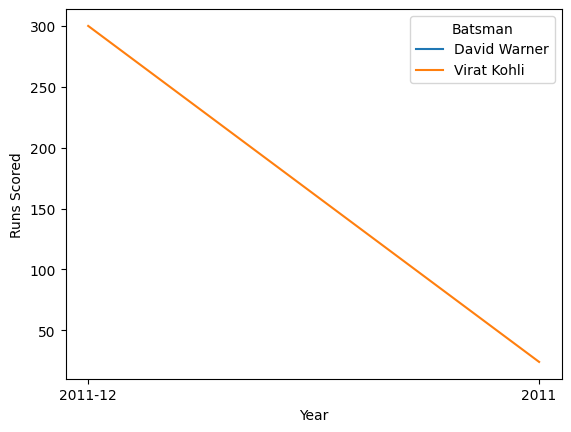

In [28]:
# How do players improve over years?
batsman_year = df.groupby(['Batsman', 'Year'])['Runs Scored'].sum().reset_index()
sns.lineplot(data=batsman_year[batsman_year['Batsman'].isin(['Virat Kohli', 'David Warner'])], x='Year', y='Runs Scored', hue='Batsman')



<Axes: xlabel='Boundary Runs', ylabel='Count'>

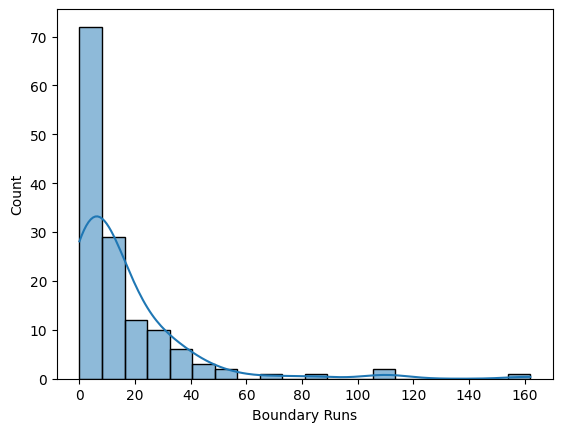

In [29]:
#Who scores more boundaries?
df['Boundary Runs'] = df['Fours']*4 + df['Sixes']*6
sns.histplot(df['Boundary Runs'], bins=20, kde=True)


In [30]:
df.describe()

Unnamed: 0  Runs Scored  Balls Faced       Fours       Sixes  \
count   139.000000   139.000000   139.000000  139.000000  139.000000   
mean    493.705036    32.647482    56.877698    3.611511    0.179856   
std    1220.371667    45.411462    68.602558    5.235762    0.554975   
min       0.000000     1.000000     4.000000    0.000000    0.000000   
25%      38.000000     7.000000    18.000000    1.000000    0.000000   
50%      80.000000    18.000000    33.000000    2.000000    0.000000   
75%     119.500000    37.000000    70.000000    4.500000    0.000000   
max    3995.000000   329.000000   468.000000   39.000000    5.000000   

       Strike Rate     Innings  Batting Position       fifty     century  \
count   139.000000  139.000000        139.000000  139.000000  139.000000   
mean     54.622662    2.230216          5.381295    0.143885    0.057554   
std      28.188134    1.051683          2.966957    0.352242    0.233740   
min       7.140000    1.000000          1.000000    0.000000    0.000000   
25%      36.295000    1.000000          3.000000    0.000000    0.000000   
50%      52.940000    2.000000          5.000000    0.000000    0.000000   
75%      69.570000    3.000000          8.000000    0.000000    0.000000   
max     146.150000    4.000000         11.000000    1.000000    1.000000   

       Boundary Runs  
count      139.00000  
mean        15.52518  
std         22.45457  
min          0.00000  
25%          4.00000  
50%          8.00000  
75%         20.00000  
max        162.00000

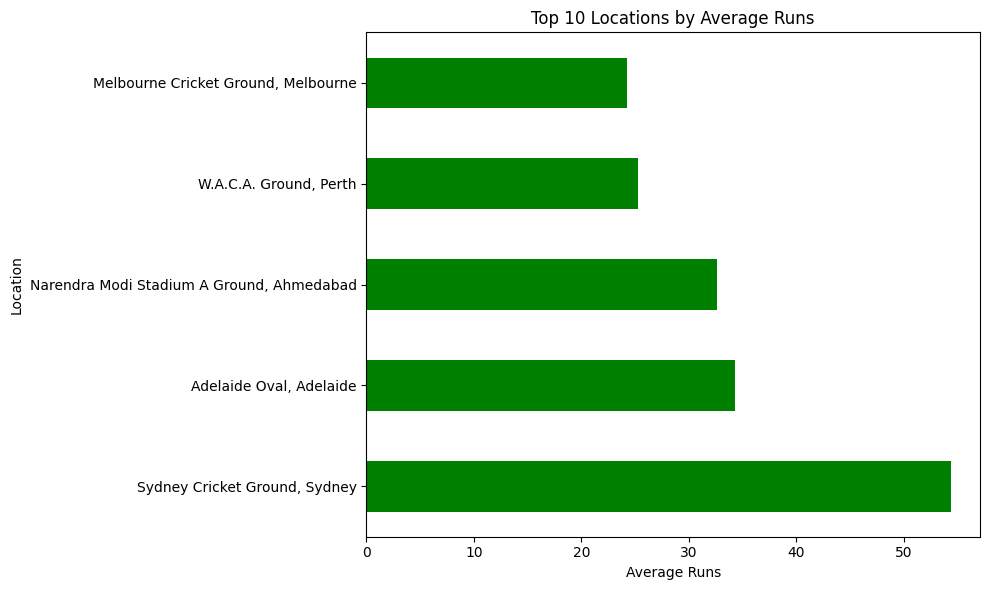

In [31]:
location_avg = df.groupby('Location')['Runs Scored'].mean().sort_values(ascending=False).head(10)
location_avg.plot(kind='barh', figsize=(10,6), color='green')
plt.title('Top 10 Locations by Average Runs')
plt.xlabel('Average Runs')
plt.tight_layout()
plt.show()


In [34]:
#Top 5 Batsmen by Average Runs:
df.groupby('Batsman')['Runs Scored'].mean().sort_values(ascending=False)


Batsman
Ricky Ponting          92.571429
Michael Clarke         90.571429
Yuvraj Singh           57.000000
Michael Hussey         49.333333
David Warner           44.333333
Virat Kohli            40.500000
David Hussey           38.000000
Sachin Tendulkar       37.777778
Ed Cowan               34.333333
Suresh Raina           34.000000
Gautam Gambhir         28.875000
Brad Haddin            27.800000
James Pattinson        27.500000
Ravichandran Ashwin    27.166667
Virender Sehwag        26.625000
Shane Watson           25.000000
Rahul Dravid           24.250000
VVS Laxman             22.142857
Ryan Harris            22.000000
Peter Siddle           19.250000
Wriddhiman Saha        19.000000
MS Dhoni               15.571429
Mitchell Starc         15.000000
Zaheer Khan            13.800000
Ben Hilfenhaus         13.000000
Cameron White          12.000000
Ishant Sharma           8.166667
Umesh Yadav             7.000000
Nathan Lyon             6.000000
Mitchell Johnson        6.000000
Sh

In [37]:
#Most Consistent Batsmen (Lowest Std Dev in Scores):
df.groupby('Batsman')['Runs Scored'].std().sort_values()


Batsman
Vinay Kumar              0.707107
Shaun Marsh              4.618802
Ishant Sharma            5.419102
Ben Hilfenhaus           6.557439
Umesh Yadav              9.416298
Zaheer Khan             13.103435
James Pattinson         13.435029
Ryan Harris             18.384776
Peter Siddle            19.311050
Ravichandran Ashwin     19.630758
MS Dhoni                19.654153
Brad Haddin             19.967474
Wriddhiman Saha         22.627417
Rahul Dravid            23.303893
VVS Laxman              23.954322
Virender Sehwag         24.715163
Sachin Tendulkar        26.176219
Gautam Gambhir          27.304827
Ed Cowan                29.486720
Virat Kohli             37.198310
Michael Hussey          58.091881
David Warner            67.695396
Ricky Ponting           69.185396
Michael Clarke         127.565483
Cameron White                 NaN
David Hussey                  NaN
Mitchell Johnson              NaN
Mitchell Starc                NaN
Nathan Lyon                   NaN
Shane 

In [38]:
#Dismissal Rate (How often each batsman gets out a certain way):
df.groupby(['Batsman', 'Dismissal Type']).size().unstack(fill_value=0).head()


Dismissal Type  bowled  caught and bowled  other  run out
Batsman                                                  
Ben Hilfenhaus       0                  3      0        0
Brad Haddin          0                  3      2        0
Cameron White        0                  1      0        0
David Hussey         0                  0      1        0
David Warner         2                  4      0        0

C:\Users\ayush\AppData\Local\Temp\ipykernel_4092\1642347772.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Batting Position', y='Runs Scored', estimator=np.mean, ci=None)


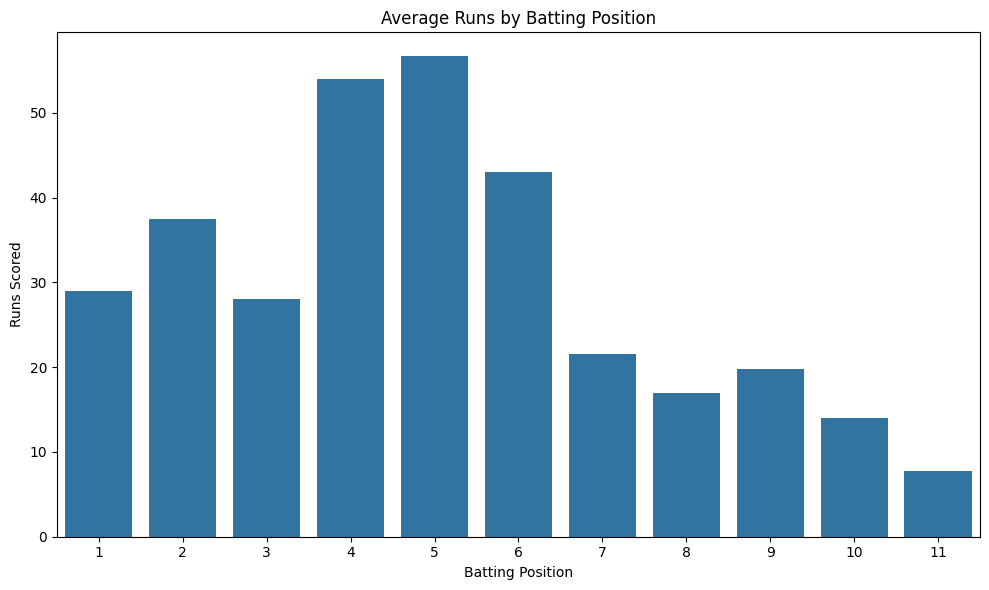

In [42]:
#  Runs Scored by Batting Position
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Batting Position', y='Runs Scored', estimator=np.mean, ci=None)
plt.title('Average Runs by Batting Position')
plt.tight_layout()
plt.show()


In [43]:
#Batsman Performance Summary
df.groupby('Batsman')['Runs Scored'].agg(['mean', 'max', 'count']).sort_values(by='mean', ascending=False).head(10)


mean  max  count
Batsman                                
Ricky Ponting     92.571429  221      7
Michael Clarke    90.571429  329      7
Yuvraj Singh      57.000000   57      1
Michael Hussey    49.333333  150      6
David Warner      44.333333  180      6
Virat Kohli       40.500000  116      8
David Hussey      38.000000   38      1
Sachin Tendulkar  37.777778   80      9
Ed Cowan          34.333333   74      6
Suresh Raina      34.000000   34      1

In [45]:
#Most Sixes or Fours by Player
df.groupby('Batsman')[['Fours', 'Sixes']].sum().sort_values('Sixes', ascending=False).head(10)

Fours  Sixes
Batsman                          
David Warner            29      6
Brad Haddin             10      3
Michael Clarke          77      2
Ravichandran Ashwin     19      2
Zaheer Khan             10      2
Michael Hussey          31      1
MS Dhoni                11      1
David Hussey             3      1
Sachin Tendulkar        45      1
Umesh Yadav              3      1